In [17]:
import numpy as np
from PIL import Image
import cv2
import matplotlib.pyplot as plt

We've been covering convolutional neural networks alot these past few weeks and today I want to build (part of) the actual convolution operation from the ground up (we will skip some details and I will leave these with you to implement and experiment with). Our goal today will be to implement the simple filtering which takes place when we apply a convolution, using numpy.

For all that have attended our sessions this year I want to give you some words which I hope stick with you. Tasks like this can sometimes seem pointless in the face of all the abstractions available to us and especially with all the hype in the space right now it's easy to pass up on performing such tasks. However, it is exactly these tasks that will set you apart from the others and better still these projects provide mechanisms for you to go deep and not just use the technology available but to actually understand it through building it from the ground up. This is special, the fact that the field of deep learning allows us to do this is special, the vast amount of papers available on https://arxiv.org (and other publications) with the open source repositories allows us to explore how all of this technology is built.

Anyways, my philosophical rant aside lets get going on implementing the simple nxn filter (we will use one of the ImageWoof pics as an example)!

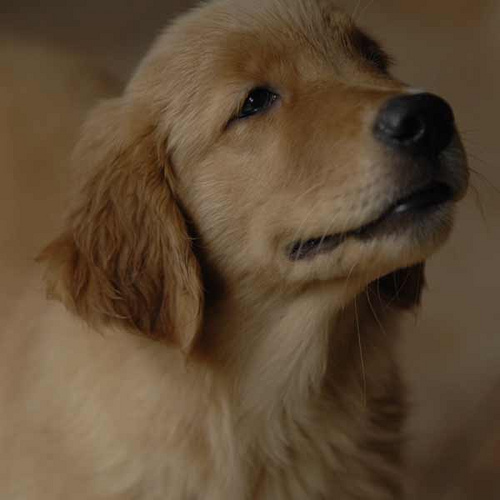

In [182]:
img = Image.open("image_example.JPEG")
img

In [183]:
np_img = np.array(img)
np_img.shape

(500, 500, 3)

Lets convert the image to grayscale to make our lives easier. Converting to grayscale requires joining the three colour channels together. Let's use the formula which the opencv function RGB2GRAY uses which is as follows: 

(0.299 x R) + (0.587 x G) + (0.114 x B) = grayscale_img

In [184]:
def imshow(img):
    plt.imshow(img, cmap='gray')
    plt.show()

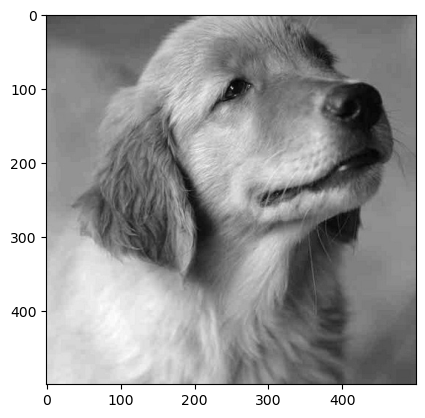

In [185]:
im = np.mean(np_img, axis=2)
imshow(im)

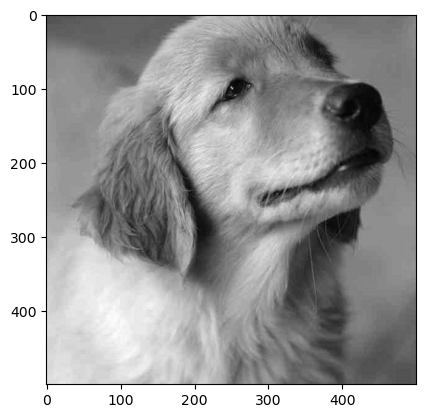

(500, 500)

In [186]:
grayscale_img = (np_img[:, :, 0] * 0.299) + (np_img[:, :, 1] * 0.587) + (np_img[:, :, 2] * 0.114)
imshow(grayscale_img)
grayscale_img.shape

Now lets create the algorithm to filter over the image.
For our simple case we will randomly initialise the weights in the filter (as you would in a neural network prior to tuning the weights through training)

Let's start with a simple 2x2 filter and then we will generalise it to an nxn filter

In [187]:
# I suggest starting by just printing a 2x2 area of the grayscale_img array. Then we can use this region and take
# the dot product with the filter vector
# Lets also make a small test case matrix to make it more clear what we are printing, once our method works on 
# that we can assume it works on the actual image
# We restrict our algorithm to work on cases where the 2x2 filter actully fits within the image fully

mat = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12], [1,1,1,1]])
mat_2 = np.array([[1,2,3], [4,5,6], [7,8,9]])

print(mat, '\n')

for i in range(len(mat)):
    for j in range(len(mat[i])):
        if j+2 > len(mat[i]-2) or i+2 > len(mat-2):
            continue
        print(mat[i:i+2, j:j+2])
        print('\n')

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [ 1  1  1  1]] 

[[1 2]
 [5 6]]


[[2 3]
 [6 7]]


[[3 4]
 [7 8]]


[[ 5  6]
 [ 9 10]]


[[ 6  7]
 [10 11]]


[[ 7  8]
 [11 12]]


[[ 9 10]
 [ 1  1]]


[[10 11]
 [ 1  1]]


[[11 12]
 [ 1  1]]




Now lets create a function called filtr to extract an n*n area 

<b>Further exercise the algorithm we are currently adopting is a O(n^2) algorithm which is quite slow, could you think of a way to speed this up? Hint: unpack the array) </b>

In [188]:
def filtr(img_arr, n):
    # As mentioned above this function in its current form is quite inefficient and can be improved alot
    # Also, as a test add some error checking, e.g. what is n is greater than the size of the input img and 
    # how would you extend this function to work on an RGB image?
    for i in range(len(img_arr)):
        for j in range(len(img_arr[i])):
            if j+n > len(img_arr[i])-n or i+n > len(img_arr)-n:
                continue
            section = img_arr[i:i+n, j:j+n]
            print(section)

We now have a function which will create the actual n*n areas from an input image. Lets extend this function to perform the element-wise product operation present in Convolutional layers and then return the filtered img.

In [189]:
# For our exaple we will generate an n*n kernel with randomly intialised weights
# We will extend our filter function to create the convolution
# The function will return a new numpy array, 

n = 3
kernel = np.random.rand(n, n)

def convolution(img_arr, n, kernel):
    dim_out = len(img_arr) - (n-1) - 1 + 1
    output = np.zeros((dim_out, dim_out))  # Initialize output array
    
    for i in range(len(img_arr)):
        for j in range(len(img_arr[i])):
            if j+n > len(img_arr[i]-n) or i+n > len(img_arr-n):
                continue
            section = img_arr[i:i+n, j:j+n]
            
            filtered_value = np.sum(section * kernel)
            output[i, j] = filtered_value
    
    return output
            

In [190]:
convolution(mat, n, kernel)

array([[33.43381202, 39.17326404],
       [30.22090419, 33.96143946]])

In [191]:
mat

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [ 1,  1,  1,  1]])

In [192]:
n = 12
kernel = np.random.rand(n, n)

out_img = convolution(grayscale_img, n, kernel)

So we have implemented one part of the convolution operation and we can see the filtering taking place on the input image. Bear in mind our output is essentially a blurred image, but this is due to our random weights. The next step would be to implement this into a larger system whereby we actually tune the weights of our neural network. I invite you to all try complete this project, it would make a killer 

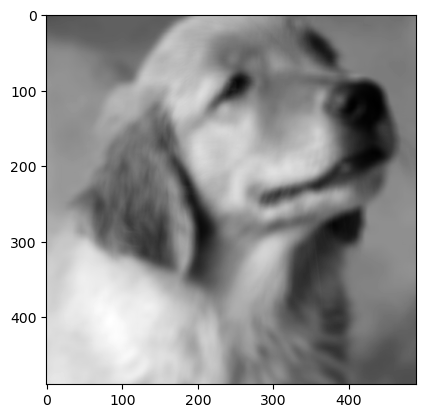

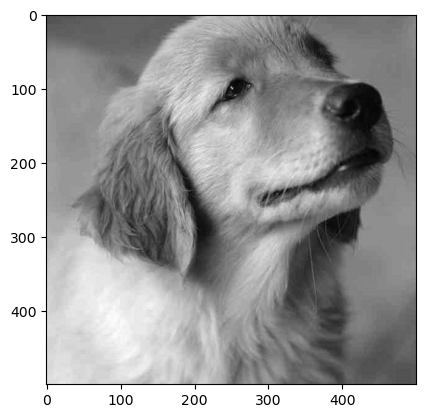

(None, None)

In [193]:
imshow(out_img), imshow(grayscale_img)

In [194]:
out_img.shape, grayscale_img.shape

((489, 489), (500, 500))

In [195]:
500 - (12 - 1) -1 +1

489